In [8]:
import nltk

In [9]:
msgs = [line.rstrip() for line in open("C:/Users/atharv/Downloads/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection")]

In [10]:
len(msgs)

5574

In [11]:
msgs[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [12]:
for messno, msg in enumerate(msgs[:10]):
    print(messno, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [13]:
import pandas as pd

In [14]:
msgs = pd.read_csv("C:/Users/atharv/Downloads/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection", sep='\t', names=['label', 'message'])

In [15]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
msgs.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
msgs['length'] = msgs['message'].apply(len)

In [19]:
msgs.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

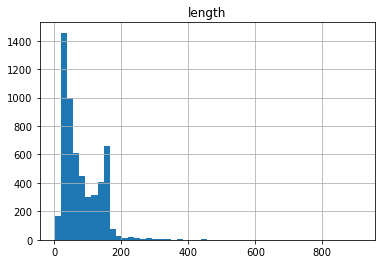

In [21]:
msgs.hist(bins=50)

as we observe, length of most messages is in between 0 to almost 200. the no. of messages starts decreasing as we increase the length of text. it's understandable because more length can mean that it could be a long personal message.

In [22]:
msgs['length'].max()

910

In [23]:
msgs[msgs['length']==msgs['length'].max()]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [24]:
msgs[msgs['length']==msgs['length'].max()].index

Int64Index([1085], dtype='int64')

In [25]:
msgs[msgs['length']==msgs['length'].max()]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

as we can observe, the message with highest length is a personal message.

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

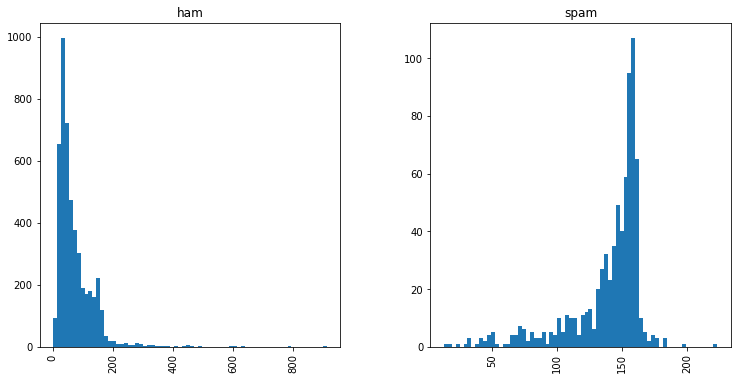

In [26]:
msgs.hist(column='length', by='label', bins=70, figsize=(12,6))

In [27]:
import string

In [28]:
mess = 'Dee yor haha! nice to meet u....'

In [29]:
nopunc = [c for c in mess if c not in string.punctuation]

In [30]:
nopunc

['D',
 'e',
 'e',
 ' ',
 'y',
 'o',
 'r',
 ' ',
 'h',
 'a',
 'h',
 'a',
 ' ',
 'n',
 'i',
 'c',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'm',
 'e',
 'e',
 't',
 ' ',
 'u']

In [31]:
from nltk.corpus import stopwords

In [32]:
# to join all letters in nopunc
nopunc = ''.join(nopunc)

In [33]:
nopunc
# nopunc without any punctuation

'Dee yor haha nice to meet u'

In [34]:
# now remove stopwords like how punctuations were removed
cleanmess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [35]:
cleanmess

['Dee', 'yor', 'haha', 'nice', 'meet', 'u']

In [36]:
# now performing these steps on DataFrame
# tokenization
def text_process(mess):
    nopunct = [char for char in mess if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    return [word for word in nopunct.split() if word.lower() not in stopwords.words('english')]

In [37]:
# applying function on dataframe msgs
msgs['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [38]:
# now convert these tokens into vectors
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bowtf = CountVectorizer(analyzer=text_process).fit(msgs['message'])

In [40]:
len(bowtf.vocabulary_)

11425

In [41]:
mess4 = msgs['message'][3]

In [42]:
mess4

'U dun say so early hor... U c already then say...'

In [43]:
bow4 = bowtf.transform([mess4])

In [44]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


2 words in that msg appear twice while all others are unique

In [45]:
bow4.shape

(1, 11425)

In [46]:
# to know what those words are...
bowtf.get_feature_names()[4068]
bowtf.get_feature_names()[9554]

'say'

In [48]:
# we just transformed one message, now lets see what happens if we pass an entire dataframe
bowmsgs = bowtf.transform(msgs['message'])

In [49]:
bowmsgs.shape

(5572, 11425)

In [50]:
# no. of nonzero occurences
bowmsgs.nnz

50548

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf = TfidfTransformer().fit(bowmsgs)

In [53]:
# see tfidf for fourth msg
tfidf4 = tfidf.transform(bow4)

In [55]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [56]:
tfidf.idf_[bowtf.vocabulary_['university']]

8.527076498901426

In [57]:
msgtfidf = tfidf.transform(bowmsgs)

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
spamdetect = MultinomialNB().fit(msgtfidf, msgs['label'])

In [61]:
spamdetect.predict(tfidf4)[0]

'ham'

In [62]:
msgs['label'][3]

'ham'

In [65]:
allpred = spamdetect.predict(msgtfidf)

In [66]:
allpred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(msgs['message'], msgs['label'], test_size=0.3, random_state=42)

In [69]:
X_train

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: message, Length: 3900, dtype: object

In [70]:
# now instead of doing all that process all over again, use pipelining
from sklearn.pipeline import Pipeline

In [71]:
pip = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
               ('tfidf',TfidfTransformer()),
               ('clf',MultinomialNB())
               ])

In [72]:
pip.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000016F6E187C10>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [73]:
pred = pip.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

